# The Complete Pokemon Dataset

Eu estava pesquisando no Kaggle atrás de um *dataset* e encontrei este. Sou fã de Pokémon desde a criança, e acredito que esta é uma ótima oportunidade de praticar e melhorar minhas habilidades com análise de dados, devido a meu rico conhecimento da franquia, porém estarei consultando o site [Serebii](https://serebii.net/index2.shtml) quando necessário.

O *notebook* ainda não está pronto mas sempre que possível estarei atualizando-o.


Questões do Autor:

* É possível criar um classificador para identificar pokémons lendários?
* Como o peso e a altura de um Pokémon se relaciona com seus atributos bases?
* Que fatores influenciam as colunas `Experience Growth` e `Egg Steps`? São correlacionados?
* Que tipo é o mais forte no geral? Qual o mais fraco?
* De qual tipo é mais provável de ser um pokémon lendário?
* Você consegue fazer um time pokémon dos sonhos? Um time com seis pokémons que possui o maior dano e ao mesmo tempo sofre pouco dano.

## Importação das Bibliotecas e do Arquivo

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling
import missingno as mn
from math import *

In [64]:
df = pd.read_csv('datasets/pokemon.csv')

In [65]:
len(df)

801

In [66]:
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [67]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

## Preparando o *Dataset*

Como de costume, a primeira coisa que irei fazer é verificar o *dataset*, com a biblioteca `missingno` podemos visualizar se existe algum dado faltando em alguma coluna.

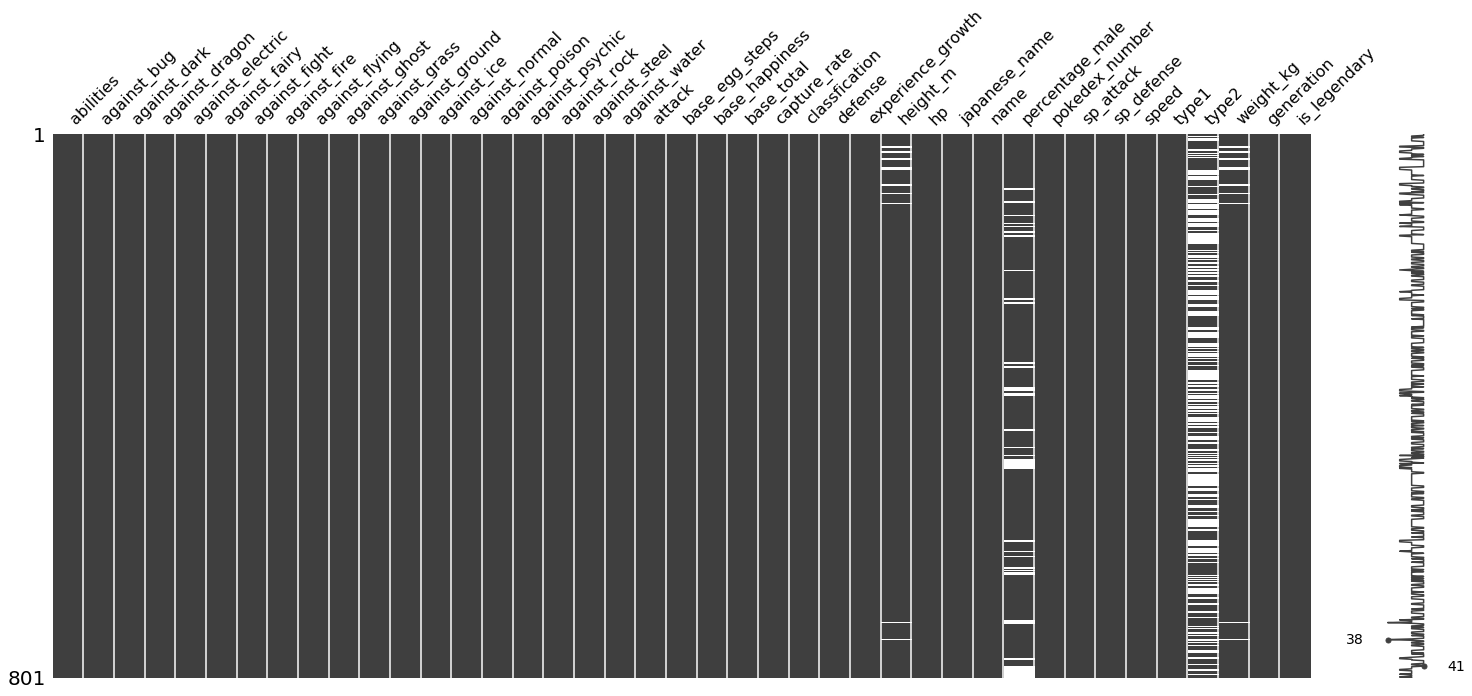

In [68]:
mn.matrix(df)
plt.show()

Apenas quatro colunas possuem dados faltosos: `height_m`, `percentage_male`, `type2` e `weight_kg`. E agora? Para esse caso não podemos excluir nem as colunas e nem as linhas, **todo** o `df` é necessário, por isso devemos preencher estes valores vazios.

Nas colunas `height_m` e `weight_kg` podemos facilmente inserir `0`, mas para a coluna `percentage_male` não é possível pois existem pokémons com valores de 0 %, ou seja, este atributo nulo ocorre para pokémons sem sexo, assim podemos atribuir `-1` à eles.

**Obs.**: Ainda não me decidi como substituir os valores para a coluna `type2`, estou pensando na melhor abordagem.

In [69]:
df.height_m.fillna(np.int(0),inplace=True)
df.weight_kg.fillna(np.int(0), inplace=True)
df.percentage_male.fillna(np.int(-1),inplace=True)
df.type2.fillna(' ',inplace=True)

Conforme mostrei em `df.columns`, temos todos os atributo base dos pokémons, mas existe um que senti falta: Total, ele é a soma de todos os atributos inviduais. Como ele será importante para este análise, irei incluí-lo no *dataset*, optei por uma solução intuitiva.

In [70]:
df['total'] = df.hp + df.attack + df.defense + df.sp_attack + df.sp_defense + df.speed

## Análise do *Dataset*

### Pokémons mais fortes

Uma coisa que eu sempre me perguntava era: qual o pokémon mais forte? Qual o pokémon mais forte de tal geração? Qual o mais forte do tipo fogo? Hoje finalmente estarei respondendo essas questões.

Decidi começar verificando quais os pokémons com os maiores status individuais, aproveitei e procurei saber quem são os pokémons com os piores status individuais.

In [94]:
status = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']
df_status = {}
for s in status:
    df_status[s] = [df.loc[df[str(s)].idxmax()]['name'], df.loc[df[str(s)].idxmin()]['name']]

df_status = pd.DataFrame(data=df_status).T
df_status.columns = ['Maior', 'Menor']

In [93]:
df_status

,Maior,Menor
hp,Blissey,Shedinja
attack,Heracross,Chansey
defense,Steelix,Chansey
sp_attack,Mewtwo,Sandshrew
sp_defense,Shuckle,Caterpie
speed,Deoxys,Shuckle


Finalmente temos os pokémons com maiores/menores status individuais, mas tem uma coisa estranha. Sabemos que os pokémos mais poderosos são justamente os pokémons lendários, então porquê está aparecendo pokémons "normais"? A resposta é bem simples: como este *dataset* possui os dados até a 6ª geração, alguns pokémons estão com os status de suas mega evoluções! Esta questão já levantada no [Kaggle](https://www.kaggle.com/rounakbanik/pokemon/discussion/62459) mas até agora não tivemos nenhum retorno do autor.

**Análise**:
* `Deoxys` é o pokémon mais rápido mas apenas em sua `Speed-Form`, informação que não foi considerada pelo autor. 
* `Shuckle` ocupa o posto de pokémon com maior defesa, este `Steelix` corresponde à sua mega evolução, Vale lembrar que os dois possuem a mesma defesa (230), porém `Steelix` foi retornado por aparecer antes no *dataset*
* `Shedinja` possui apenas 1 de HP! Já era de esperar este resultado
* Embora `Mewtwo` seja um pokémon lendário, é o `Deoxys` (na `Attack Form`) que possui o maior *Special Attack*, este status pertence à sua mega evolução.

Sabemos agora quem são os mais pokémons mais fortes por status, mas qual será o pokémon mais forte por geração?

In [95]:
df.sort_values(by='total', ascending=False).drop_duplicates(subset=['generation'],keep='first').sort_values(by='generation')[['name','generation']]

,name,generation
149,Mewtwo,1
247,Tyranitar,2
383,Rayquaza,3
492,Arceus,4
645,Kyurem,5
717,Zygarde,6
791,Lunala,7


O resultado foi prevísivel: apenas pokémons lendários... exceto pela terceira geração. Novamente caímos no *bait* da mega evolução, o resultado correto para esta consulta é `Lugia` e `Ho-Oh`, os dois possuem o mesmo valor para o atributo `Total`.

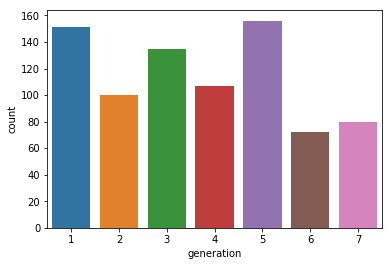

In [7]:
sns.countplot(df.generation)
plt.show()

In [10]:
df.sort_values(by='total', ascending=False).drop_duplicates(subset=['type1'], keep='first')[['name', 'type1', 'is_legendary']]

,name,type1,is_legendary
149,Mewtwo,psychic,1
383,Rayquaza,dragon,1
382,Groudon,ground,1
381,Kyogre,water,1
492,Arceus,normal,1
247,Tyranitar,rock,0
375,Metagross,steel,0
716,Yveltal,dark,1
715,Xerneas,fairy,1
249,Ho-Oh,fire,1


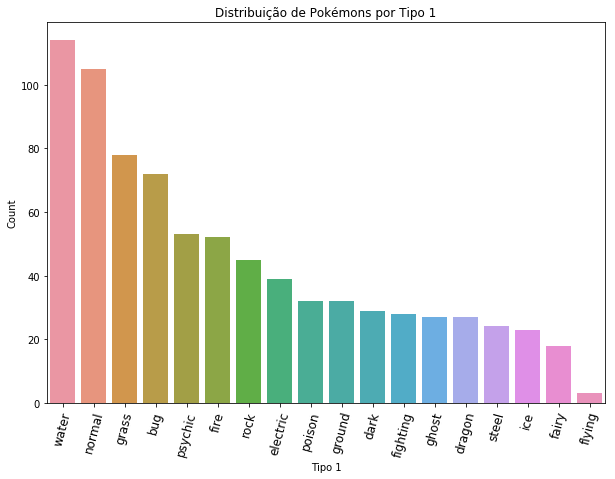

In [11]:
type1 = df.type1.value_counts()

plt.figure(figsize = (10,7))

ax = sns.barplot(x=type1.index, y=type1, data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 75, fontsize = 12)
ax.set(xlabel='Tipo 1', ylabel='Count')
ax.set_title('Distribuição de Pokémons por Tipo 1')
plt.show()

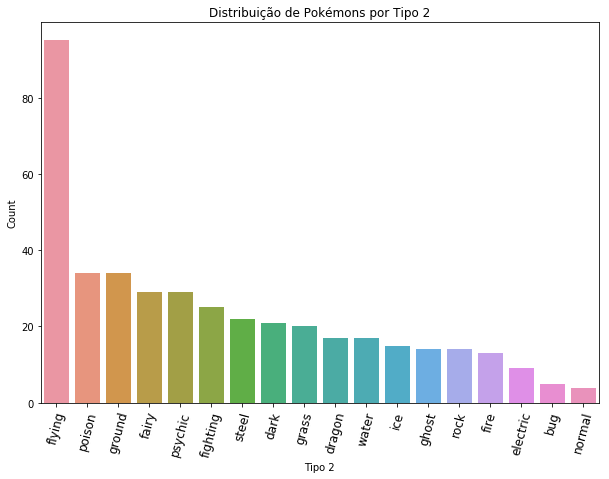

In [47]:
type2 = df.type2.value_counts()
type2.drop(type2.index[0],inplace=True)

plt.figure(figsize = (10,7))

ax = sns.barplot(x=type2.index, y=type2, data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 75, fontsize = 12)
ax.set(xlabel='Tipo 2', ylabel='Count')
ax.set_title('Distribuição de Pokémons por Tipo 2')
plt.show()

In [13]:
df['comb_type'] = df.type1 + str(' ') + df.type2

In [14]:
df['comb_type'].value_counts().reset_index(name="count").query("count > 10")

,index,count
0,normal,61
1,water,61
2,grass,37
3,psychic,35
4,fire,27
5,normal flying,26
6,electric,26
7,fighting,22
8,bug,18
9,fairy,16


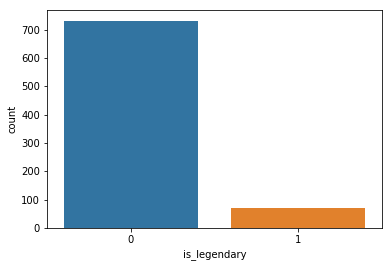

In [15]:
sns.countplot(df.is_legendary)
plt.show()

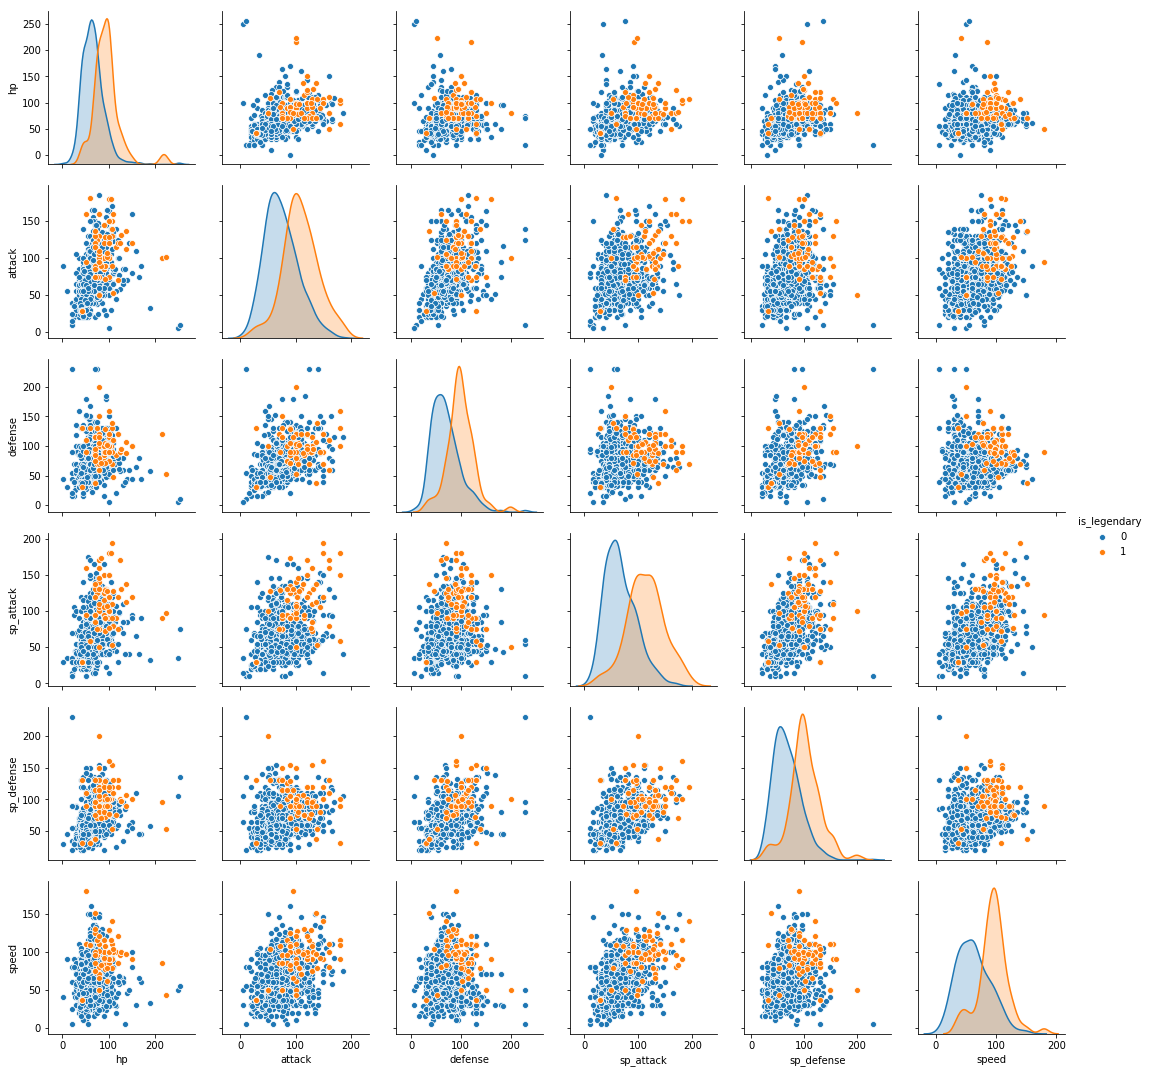

In [32]:
sns.pairplot(df, vars=['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed'], hue='is_legendary')
plt.show()

In [17]:
def boxplot_by_type(xaxis,yaxis,xlabel,ylabel,title):
    
    plt.figure(figsize = (10,7))
    ax = sns.boxplot(x=xaxis, y=yaxis, data=df)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 75, fontsize = 12)
    ax.set(xlabel=xlabel, ylabel=ylabel)
    ax.set_title(title)
    plt.show()

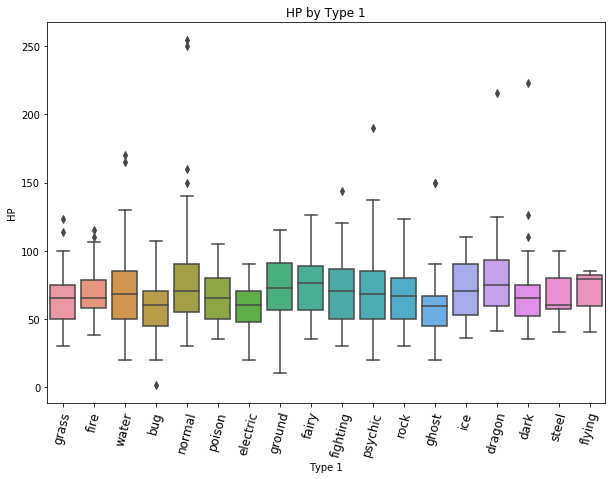

In [18]:
boxplot_by_type('type1', 'hp', 'Type 1', 'HP', 'HP by Type 1')

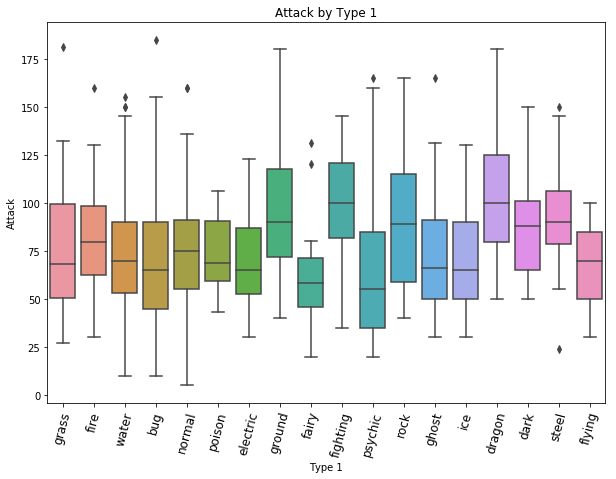

In [19]:
boxplot_by_type('type1', 'attack', 'Type 1', 'Attack', 'Attack by Type 1')

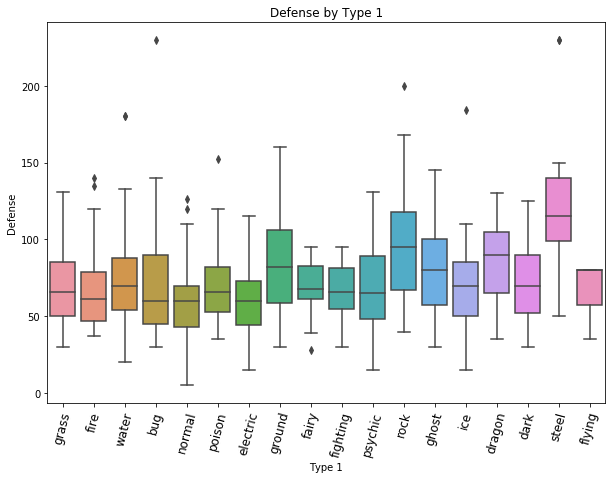

In [20]:
boxplot_by_type('type1', 'defense', 'Type 1', 'Defense', 'Defense by Type 1')

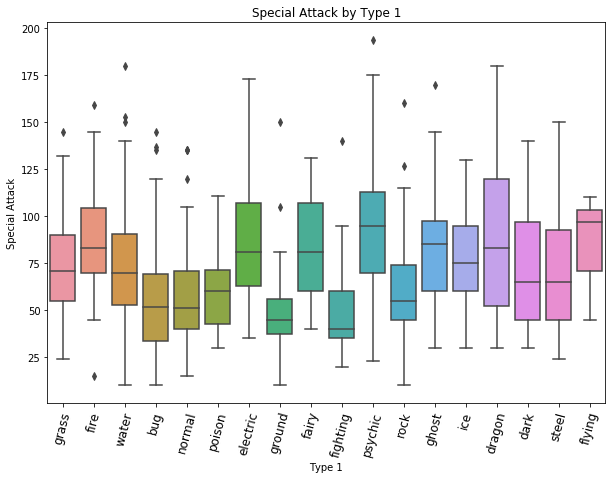

In [21]:
boxplot_by_type('type1', 'sp_attack', 'Type 1', 'Special Attack', 'Special Attack by Type 1')

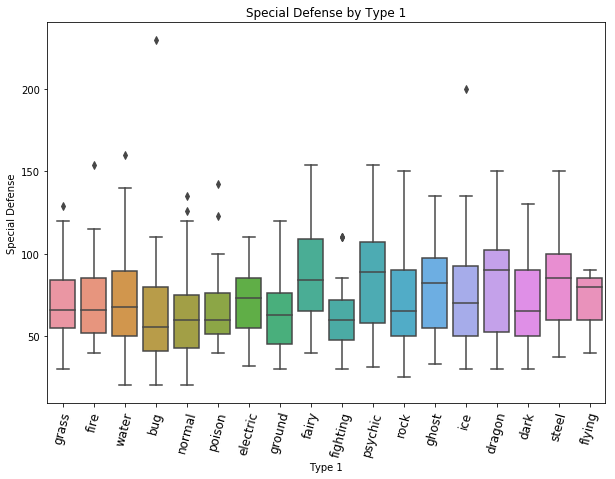

In [22]:
boxplot_by_type('type1', 'sp_defense', 'Type 1', 'Special Defense', 'Special Defense by Type 1')

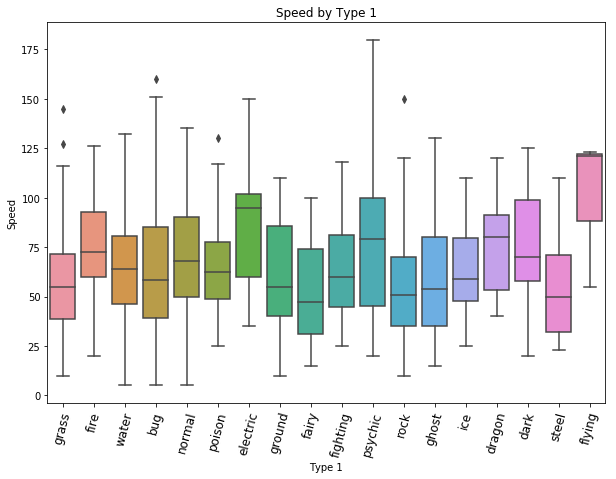

In [23]:
boxplot_by_type('type1', 'speed', 'Type 1', 'Speed', 'Speed by Type 1')

In [24]:
df_tg = df.groupby(['generation', 'type1']).count().reset_index()
df_tg = df_tg[['generation', 'type1', 'total']]
df_tg = df_tg.pivot('generation', 'type1', 'total')
df_tg.fillna(0,inplace=True)
df_tg

type1,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
generation,,,,,,,,,,,,,,,,,,
1,12.0,0.0,3.0,9.0,2.0,7.0,12.0,0.0,3.0,12.0,8.0,2.0,22.0,14.0,8.0,9.0,0.0,28.0
2,10.0,5.0,0.0,6.0,5.0,2.0,8.0,0.0,1.0,9.0,3.0,4.0,15.0,1.0,7.0,4.0,2.0,18.0
3,12.0,4.0,7.0,4.0,0.0,4.0,6.0,0.0,4.0,12.0,6.0,6.0,18.0,3.0,8.0,8.0,9.0,24.0
4,8.0,3.0,3.0,7.0,1.0,2.0,5.0,0.0,6.0,13.0,4.0,3.0,17.0,6.0,7.0,6.0,3.0,13.0
5,18.0,13.0,7.0,7.0,0.0,7.0,8.0,1.0,5.0,15.0,9.0,6.0,17.0,2.0,14.0,6.0,4.0,17.0
6,3.0,3.0,4.0,3.0,9.0,3.0,8.0,2.0,4.0,5.0,0.0,2.0,4.0,2.0,3.0,8.0,4.0,5.0
7,9.0,1.0,3.0,3.0,1.0,3.0,5.0,0.0,4.0,12.0,2.0,0.0,12.0,4.0,6.0,4.0,2.0,9.0


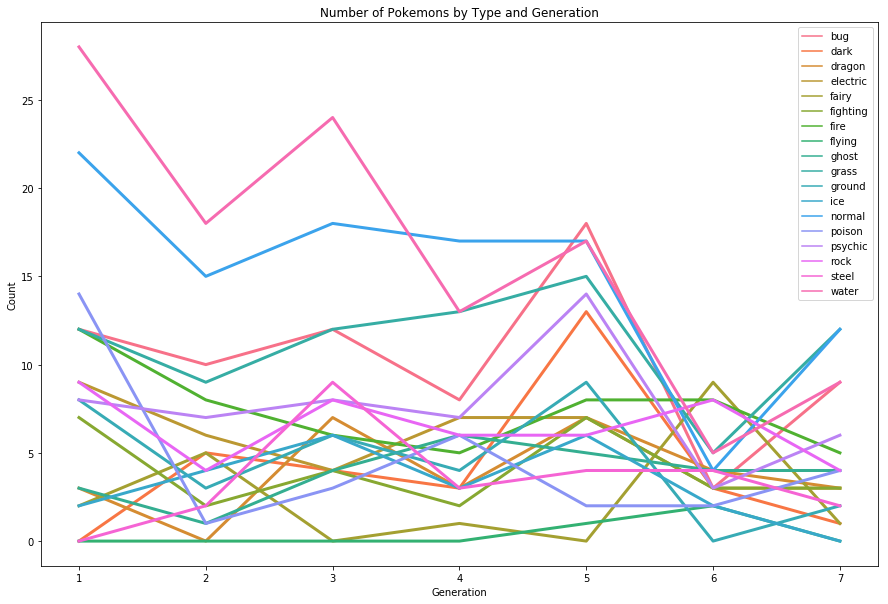

In [25]:
plt.figure(figsize = (15,10))

ax = sns.lineplot(data=df_tg, dashes=False, linewidth=3.0)
ax.set(xlabel='Generation',ylabel='Count')
ax.set_title('Number of Pokemons by Type and Generation')
plt.show()

In [26]:
df.loc[df.type2 == ' ', 'type2'] = 'None'

In [27]:
df_tg = df.groupby(['generation', 'type2']).count().reset_index()
df_tg = df_tg[['generation', 'type2', 'total']]
df_tg = df_tg.pivot('generation', 'type2', 'total')

In [28]:
type2_none = df_tg['None']
df_tg.drop(['None'],axis=1,inplace=True)

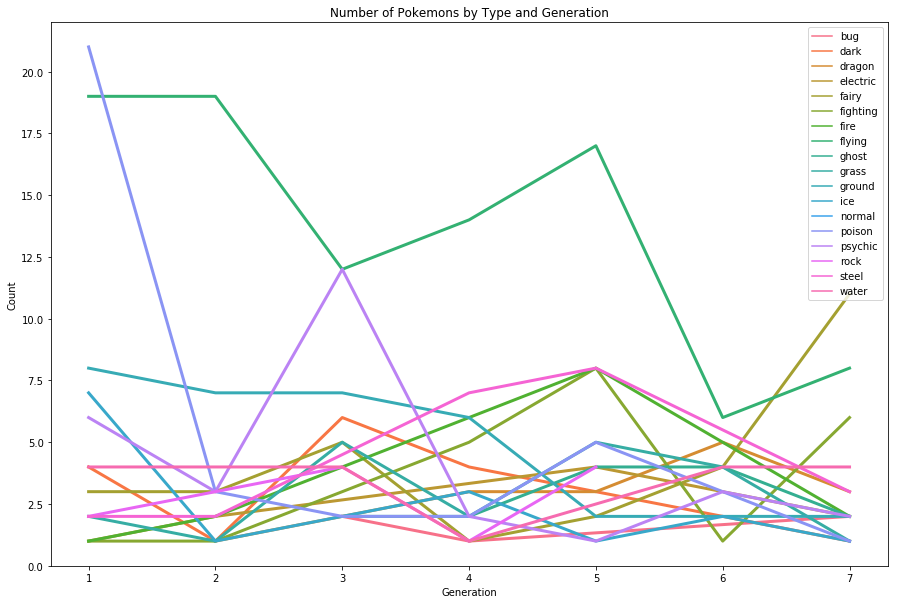

In [29]:
plt.figure(figsize = (15,10))

ax = sns.lineplot(data=df_tg, dashes=False, linewidth=3.0)
ax.set(xlabel='Generation',ylabel='Count')
ax.set_title('Number of Pokemons by Type and Generation')
plt.show()

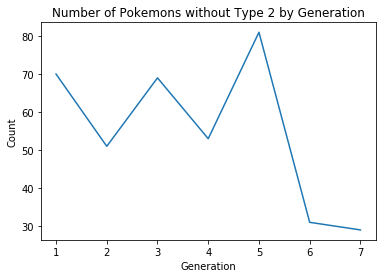

In [30]:
ax = sns.lineplot(data=type2_none)
ax.set(xlabel='Generation', ylabel='Count')
ax.set_title('Number of Pokemons without Type 2 by Generation')
plt.show()

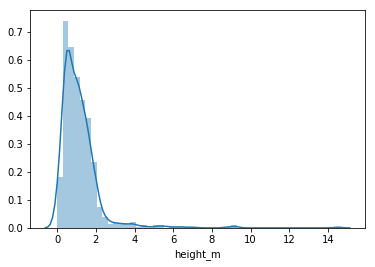

In [49]:
sns.distplot(df.height_m)
plt.show()

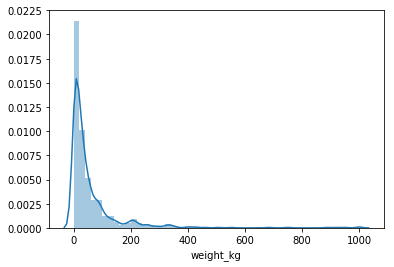

In [51]:
sns.distplot(df.weight_kg)
plt.show()

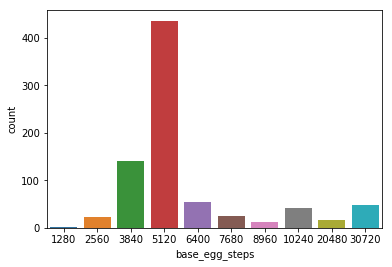

In [53]:
sns.countplot(df.base_egg_steps)
plt.show()

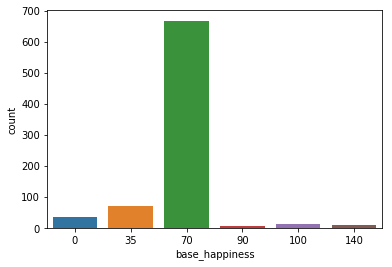

In [55]:
sns.countplot(df.base_happiness)
plt.show()